![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjFm003pSAOtHmnUm7e--Xquwo90Hp5-U_3wSZrkChGz4tQYWZ)
# Introduction to Machine Learning
##Week 3: Classification. Logistic regression

In this lab, you will implement your own classifier based on Logistic Regression algorithm. You will apply gradient descent to a new problem. We will revisit linear regression to apply it for polynomial case and explore splines and compare them with polynomial regression.

Plan for this lab:

1.    Basic visualizations
2.    Logistic regression
3.    Confusion matrix
4.    Polynomial regression
5.    Splines

###Concepts Visualization

Here are main equations behind Logistic Regression:

$\hat p(x) = \frac{e^{\beta_0 + \beta_1 x}}{1+e^{\beta_0 + \beta_1 x}}$

$L(\hat{p}(x_i), y_i) = -y_i\log (\hat{p}(x_i)) - (1 - y)_i\log (1 -\hat{p}(x_i))$

$L(\hat{p}(x_i), y_i) = \left\{\begin{matrix}
\ - log (\hat{p}(x_i)), & y_i=1\\ 
\ - log (1 -\hat{p}(x_i)), & y_i=0
\end{matrix}\right.$

$\hat y = \left\{\begin{matrix}
1 && \hat p(x) > threshold\\ 
0 && otherwise 
\end{matrix}\right.$

<br>

Let's now see how shape of $\hat p(x)$ depend on its parameters:

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

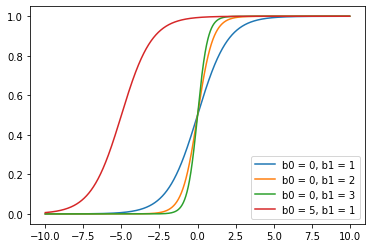

In [0]:
x = np.arange(-10, 10, 0.01)

def plot(b0, b1):
    p = np.exp(b0 + b1 * x) / (1 + np.exp(b0 + b1 * x))
    label = "b0 = {}, b1 = {}".format(b0, b1)
    plt.plot(x, p, label=label)

plot(0,1)
plot(0,2)
plot(0,3)
plot(5,1)
plt.legend()
plt.show()

Let's now visualize the components of the Loss function:

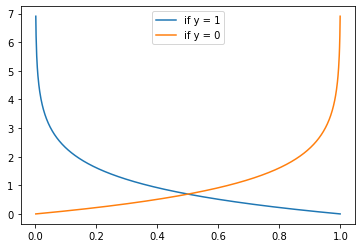

In [0]:
x = np.arange(0.001, 1, 0.001)
y1 = -np.log(x)
y0 = -np.log(1-x)

plt.plot(x,y1, label="if y = 1")
plt.plot(x,y0, label="if y = 0")
plt.legend()
plt.show()

###Logistic Regression

Your task now is to implement Logistic Regression using Gradient Descent algorithm (recall previous week!).
We will be working with simple classification dataset called **Iris**, which is provided by Sklearn library. Let's take a look on it.

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
print('First 10 rows of iris dataset:')
iris.data[:10,:]

First 10 rows of iris dataset:


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [0]:
print('Outputs of iris dataset:')
iris.target

Outputs of iris dataset:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


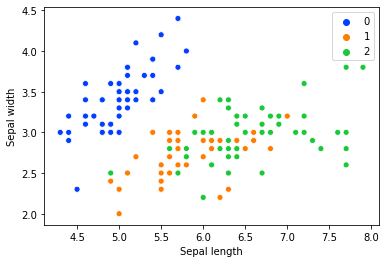

In [0]:
import seaborn as sns
# we can only plot for any two features, let's take the first ones
sns.scatterplot(x=iris.data[:,:1].ravel(), y=iris.data[:,1:2].ravel(), hue=iris.target.ravel(), palette=sns.color_palette("bright", 3))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
print({i:iris.target_names[i] for i in range(0,iris.target_names.size)})

Now that we have an idea about the dataset, our task is classify iris species given their characteristics. For the sake of simplificity, let's try to predict iris type based on just one feature. Apply gradient descent algorithm from the previous lab. Complete needed methods in LogisticRegressionGD class.

Resulting acuracy: 0.85
b0, b1: -26.23287761967686 4.819636138003015


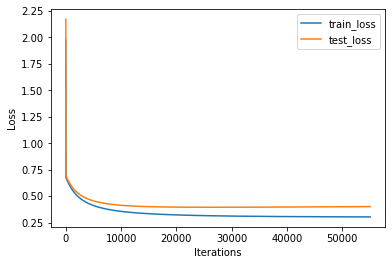

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


class LogisticRegressionGD:
  
    def __init__(self, b0 = 0, b1 = 1, alpha = 0.001, thresh = 0.5, p_precision = 0.0001):
      self.b0 = b0 # initial b0 value
      self.b1 = b1 # initial b1 value
      self.alpha = alpha # learning rate
      self.threshold = thresh # threshold for decision-making, from 0 to 1
      self.params_precision = p_precision # sensitivity to parameters change, stop iterating if difference is less than it
      self.train_loss = [] # list of train loss values for every iteration 
      self.test_loss = [] # list of test loss values for every iteration 
    
    def __sigma(self, z):
      """
      Calculates sigmoid function
      input:
      z - numpy array
      output:
      result of applying sigmoid function
      """
      ### START CODE HERE ###
      e = np.exp(z)      
      return e / (1 + e)
      ### END CODE HERE ###
           
    def __grad(self, X_train, y_train):
      """      
      Computes gradient
      input:
      x - train data
      y - response
      output:
      Partial derivatives wrt b0, b1
      """
      ### START CODE HERE ###
      z = self.b0 + self.b1 * X_train
      db0vec = self.__sigma(z).ravel() - y_train
      dLdb0 = sum(db0vec)
      dLdb1 = float(np.dot(db0vec, X_train))
      ### END CODE HERE ###
      return dLdb0, dLdb1      
        
    def __predict_prob(self, X):
      """
      Predicts probabilities
      input:
      X - data
      output:
      p(x), probabilities
      """
      ### START CODE HERE ###
      z = self.b0 + self.b1 * X
      return self.__sigma(z)
      ### END CODE HERE ###
         
    def __loss(self, X, y):
      """
      Calculates current loss, calls __predict_prob method
      """
      ### START CODE HERE ###
      prob = self.__predict_prob(X)
      result = -np.dot(y, np.log(prob)) - np.dot((1-y), np.log(1 - prob))
      return result / y.size
      ### END CODE HERE ###
    
    def predict(self, X):
      """
      Predicts class (0/1), from probabilities, based on threshold
      input:
      X - data
      output:
      binary
      """
      ### START CODE HERE ###
      prob = self.__predict_prob(X)
      return prob > self.threshold
      ### END CODE HERE ###
    
    def plot_loss(self):
      """
      Plots train/test loss over time, using self.train_loss and self.test_loss 
      """
      iters = np.arange(len(self.train_loss))
      plt.plot(iters, self.train_loss, label = "train_loss")
      plt.plot(iters, self.test_loss, label = "test_loss")
      plt.legend()
      plt.xlabel('Iterations')
      plt.ylabel('Loss')
      plt.show()
    
    def fit(self, X_train, y_train, X_test, y_test):
      """
      Main method. Performs gradient descent. Iterates until both parameters
      don't change by more that self.params_precision. Collects train_loss and test_loss
      input:
      train and test data
      output:
      no output, b0 and b1 variables get updated     
      """      
      dLdb0, dLdb1 = self.__grad(X_train, y_train)
      delta0 = - self.alpha * dLdb0
      delta1 = - self.alpha * dLdb1
      while(abs(delta0) > self.params_precision or abs(delta1) > self.params_precision):
          ### START CODE HERE ###
          self.b0 += delta0
          self.b1 += delta1
          dLdb0, dLdb1 = self.__grad(X_train, y_train)
          delta0 = - self.alpha * dLdb0
          delta1 = - self.alpha * dLdb1
          self.train_loss.append(self.__loss(X_train, y_train))
          self.test_loss.append(self.__loss(X_test, y_test))
          ### END CODE HERE ###


# Let's take the first data column and first two classes for our experiments
y = iris.target
X = iris.data[y!=2,0:1]
y = y[y!=2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)
model = LogisticRegressionGD()
model.fit(X_train, y_train, X_test, y_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Resulting acuracy:", accuracy)
print("b0, b1:", model.b0, model.b1)

model.plot_loss()

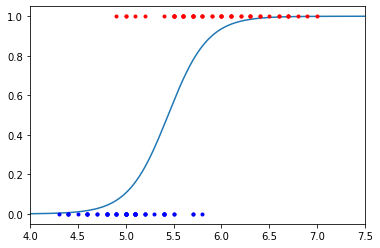

In [0]:
# Visualizing the resulting sigmoid
x = np.arange(-10, 10, 0.01)
p = np.exp(model.b0 + model.b1 * x) / (1 + np.exp(model.b0 + model.b1 * x))
plt.plot(x, p, label="sigmoid")
plt.plot(iris.data[iris.target==0,0:1], [0]*50, 'bo', markersize=3)
plt.plot(iris.data[iris.target==1,0:1], [1]*50, 'ro', markersize=3)
plt.xlim(4, 7.5)
plt.show()

###Sklearn solution

In [0]:
from sklearn.linear_model import LogisticRegression

model_lib = LogisticRegression(solver='liblinear', multi_class='ovr')
model_lib.fit(X, y)
y_pred = model_lib.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Sklearn accuracy:", accuracy)

Sklearn accuracy: 0.85


###Confusion matrix


Write your own code to fill in confusion matrix based on 2 arrays of labels - true (actual) ones and predicted. Ideally, it should generalize to any number of classses.

In [0]:
true_labels = np.array([2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0])
pred_labels = np.array([2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2])


In [0]:
def calc_confusion_matrix(true_labels, pred_labels):
  """
  Calculates confusion matrix: 
  True labels along Y axis, Predicted ones along X axis
  """
  ### START CODE HERE ###
  num_labels = np.unique(true_labels).size
  cm = np.zeros((num_labels, num_labels), dtype=int)
  for a, p in zip(true_labels, pred_labels):
                cm[a][p] += 1
  return cm
  ### END CODE HERE ###

calc_confusion_matrix(true_labels, pred_labels)

array([[4, 1, 2],
       [3, 0, 2],
       [1, 2, 1]])

In [0]:
# Run this block of code to see what your result should look like
from sklearn.metrics import confusion_matrix
confusion_matrix(true_labels, pred_labels)

array([[4, 1, 2],
       [3, 0, 2],
       [1, 2, 1]])

###Polynomial Regression

$y = b_0 + b_1x + b_2x^2 +....+ b_nx^n$

The model is still linear wrt $b$, hence, we can use linear regression.

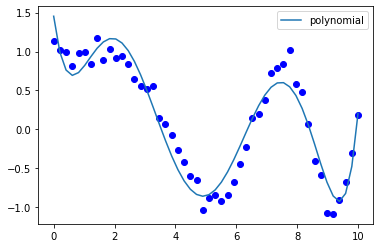

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.linspace(0, 10, 50)
y = np.cos(-x**2/9.0) + np.random.normal(0, 0.1, (x.size))

plt.plot(x,y, 'bo')


def fit_polynomial(x, y, degree):
  """
  Produces polynomial features for x and applies linear regression on (x,y)
  """
  poly_features = PolynomialFeatures(degree=degree)    
  X_poly = poly_features.fit_transform(x.reshape(-1, 1))    
  model = LinearRegression()
  model.fit(X_poly, y)
  return model
  
def apply_polynomial(model, x):
  """
  Applies learned model on x
  Returns predictions for each of x points
  """
  ### START CODE HERE ###
  degree = model.coef_.size - 1
  poly_features = PolynomialFeatures(degree=degree)
  X_poly = poly_features.fit_transform(x.reshape(-1, 1))    
  y = model.predict(X_poly)
  return y
  ### END CODE HERE ###
  
# find a degree of polynomial which fits the data best
model = fit_polynomial(x, y, 6)
p_y = apply_polynomial(model, x)
plt.plot(x, p_y,label="polynomial")
plt.legend()
plt.show()

### Splines

Below we will see the examples of using splines functionality in different libraries

In [0]:
!pip install csaps

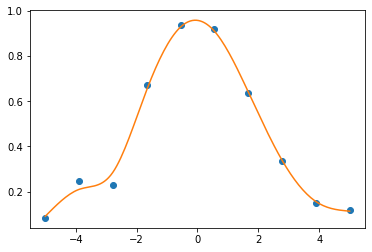

In [0]:
# smoothing spline example. try changing smooth coefficient
# https://pypi.org/project/csaps/
import csaps

np.random.seed(1)

size = 10
x = np.linspace(-5., 5., size)
y = np.exp(-(x/2.5)**2) + (np.random.rand(size) - 0.2) * 0.3

sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=0.95)

xs = np.linspace(x[0], x[-1], 150)
ys = sp(xs)

plt.plot(x, y, 'o', xs, ys, '-')
plt.show()

t: [-5. -5.  0.  5.  5.]
c: [0.02685328 1.0307278  0.05289929 0.         0.        ]
k: 1



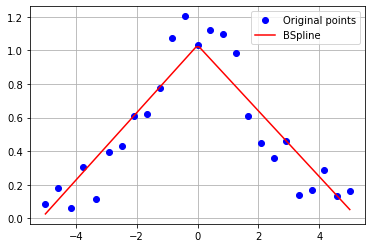

In [0]:
# B-spline example
import scipy.interpolate as interpolate

size = 25
x = np.linspace(-5., 5., size)
y = np.exp(-(x/2.5)**2) + (np.random.rand(size) - 0.2) * 0.3

# Fit B-spline and get parameters
# important parameters: s-smoothing, k - degree
t, c, k = interpolate.splrep(x, y, s=0.5, k=1)
print('''\
t: {}
c: {}
k: {}
'''.format(t, c, k))
N = 100
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)

# Create B-spline object for plotting and prediction
spline = interpolate.BSpline(t, c, k, extrapolate=False)

plt.plot(x, y, 'bo', label='Original points')
plt.plot(xx, spline(xx), 'r', label='BSpline')
plt.grid()
plt.legend(loc='best')
plt.show()

####Polynomial regression versus splines
- Splines achieve better results with less order polynomial functions
- Polynomial regression is prone to outliers whereas in splines they only affect function in some interval between the knots

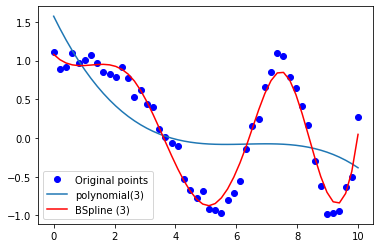

In [0]:
x = np.linspace(0, 10, 50)
y = np.cos(-x**2/9.0) + np.random.normal(0, 0.1, (x.size))
plt.plot(x, y, 'bo', label='Original points')

model = fit_polynomial(x, y, 3)
p_y = apply_polynomial(model, x)
plt.plot(x, p_y,label="polynomial(3)")


t, c, k = interpolate.splrep(x, y, s=0.85, k=3)
spline = interpolate.BSpline(t, c, k, extrapolate=False)
plt.plot(x, spline(x), 'r', label='BSpline (3)')


plt.legend()
plt.show()
